In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
train= pd.read_csv('/Users/anshmadan/Coding/IML_Juneja_Midterm/train.csv')
test= pd.read_csv('/Users/anshmadan/Coding/IML_Juneja_Midterm/test.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [3]:
print('the shape of train data',train.shape)
print('the shape of test data', test.shape)

the shape of train data (54808, 13)
the shape of test data (23490, 12)


In [4]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [5]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [6]:
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [7]:
pd.value_counts(train.dtypes)

/var/folders/vf/50v_5yhx6vq1by3x443hc2v80000gn/T/ipykernel_73097/923104402.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train.dtypes)


int64      7
object     5
float64    1
Name: count, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [9]:
unique_values= train.select_dtypes(include='number').nunique()

fig = px.bar(unique_values, title='Number of Unique Values', labels = {'x':'', 'y':'Features'}, log_y=True)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(showlegend=False)

In [ ]:
n_duplicates = train.duplicated().sum()
print(f'We have {n_duplicates} duplicates in our dataset')

We have 0 duplicates in our dataset


In [11]:
train_total = train.isnull().sum()
test_total = test.isnull().sum()
train_percent= ((train.isnull().sum()/train.shape[0])*100)
test_percent= ((test.isnull().sum()/test.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent,'test total': test_total, 'test percent': test_percent})
data_missing.sort_values(by='train total', ascending=False).head()

,train total,train percent,test total,test percent
previous_year_rating,4124,7.524449,1812.0,7.713921
education,2409,4.395344,1034.0,4.401873
age,0,0.000000,0.0,0.000000
avg_training_score,0,0.000000,0.0,0.000000
awards_won?,0,0.000000,0.0,0.000000


In [12]:
train[train['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


In [13]:
train.query('length_of_service==1 & previous_year_rating.isnull()', engine='python')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


In [14]:
hypothesis = train.query('length_of_service != 1')['previous_year_rating'].isna().any()

print(f' Is there any row with null values for previous_year_rating column and 1 for length_of_service?   {hypothesis}')

 Is there any row with null values for previous_year_rating column and 1 for length_of_service?   False


In [15]:
train[train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47,0


In [16]:
train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])

train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [17]:
print('Number of missing values in the training dataset', train.isnull().sum().sum())
print('Number of missing values in the test dataset', test.isnull().sum().sum())

Number of missing values in the training dataset 0
Number of missing values in the test dataset 0


In [18]:
train.select_dtypes('number').columns.to_list()

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [19]:
fig=px.box(train,y='avg_training_score',points='outliers', title='Outliers in Average Training Score')

fig.update_layout(hovermode='x')

In [20]:
fig=px.box(train,y='length_of_service', points='outliers', title='Outliers in Length of Service Column')

fig.update_layout(hovermode='x')

In [21]:
train['length_of_service']=np.where( train['length_of_service']>13,13, train['length_of_service'])
train['length_of_service'].max()

13

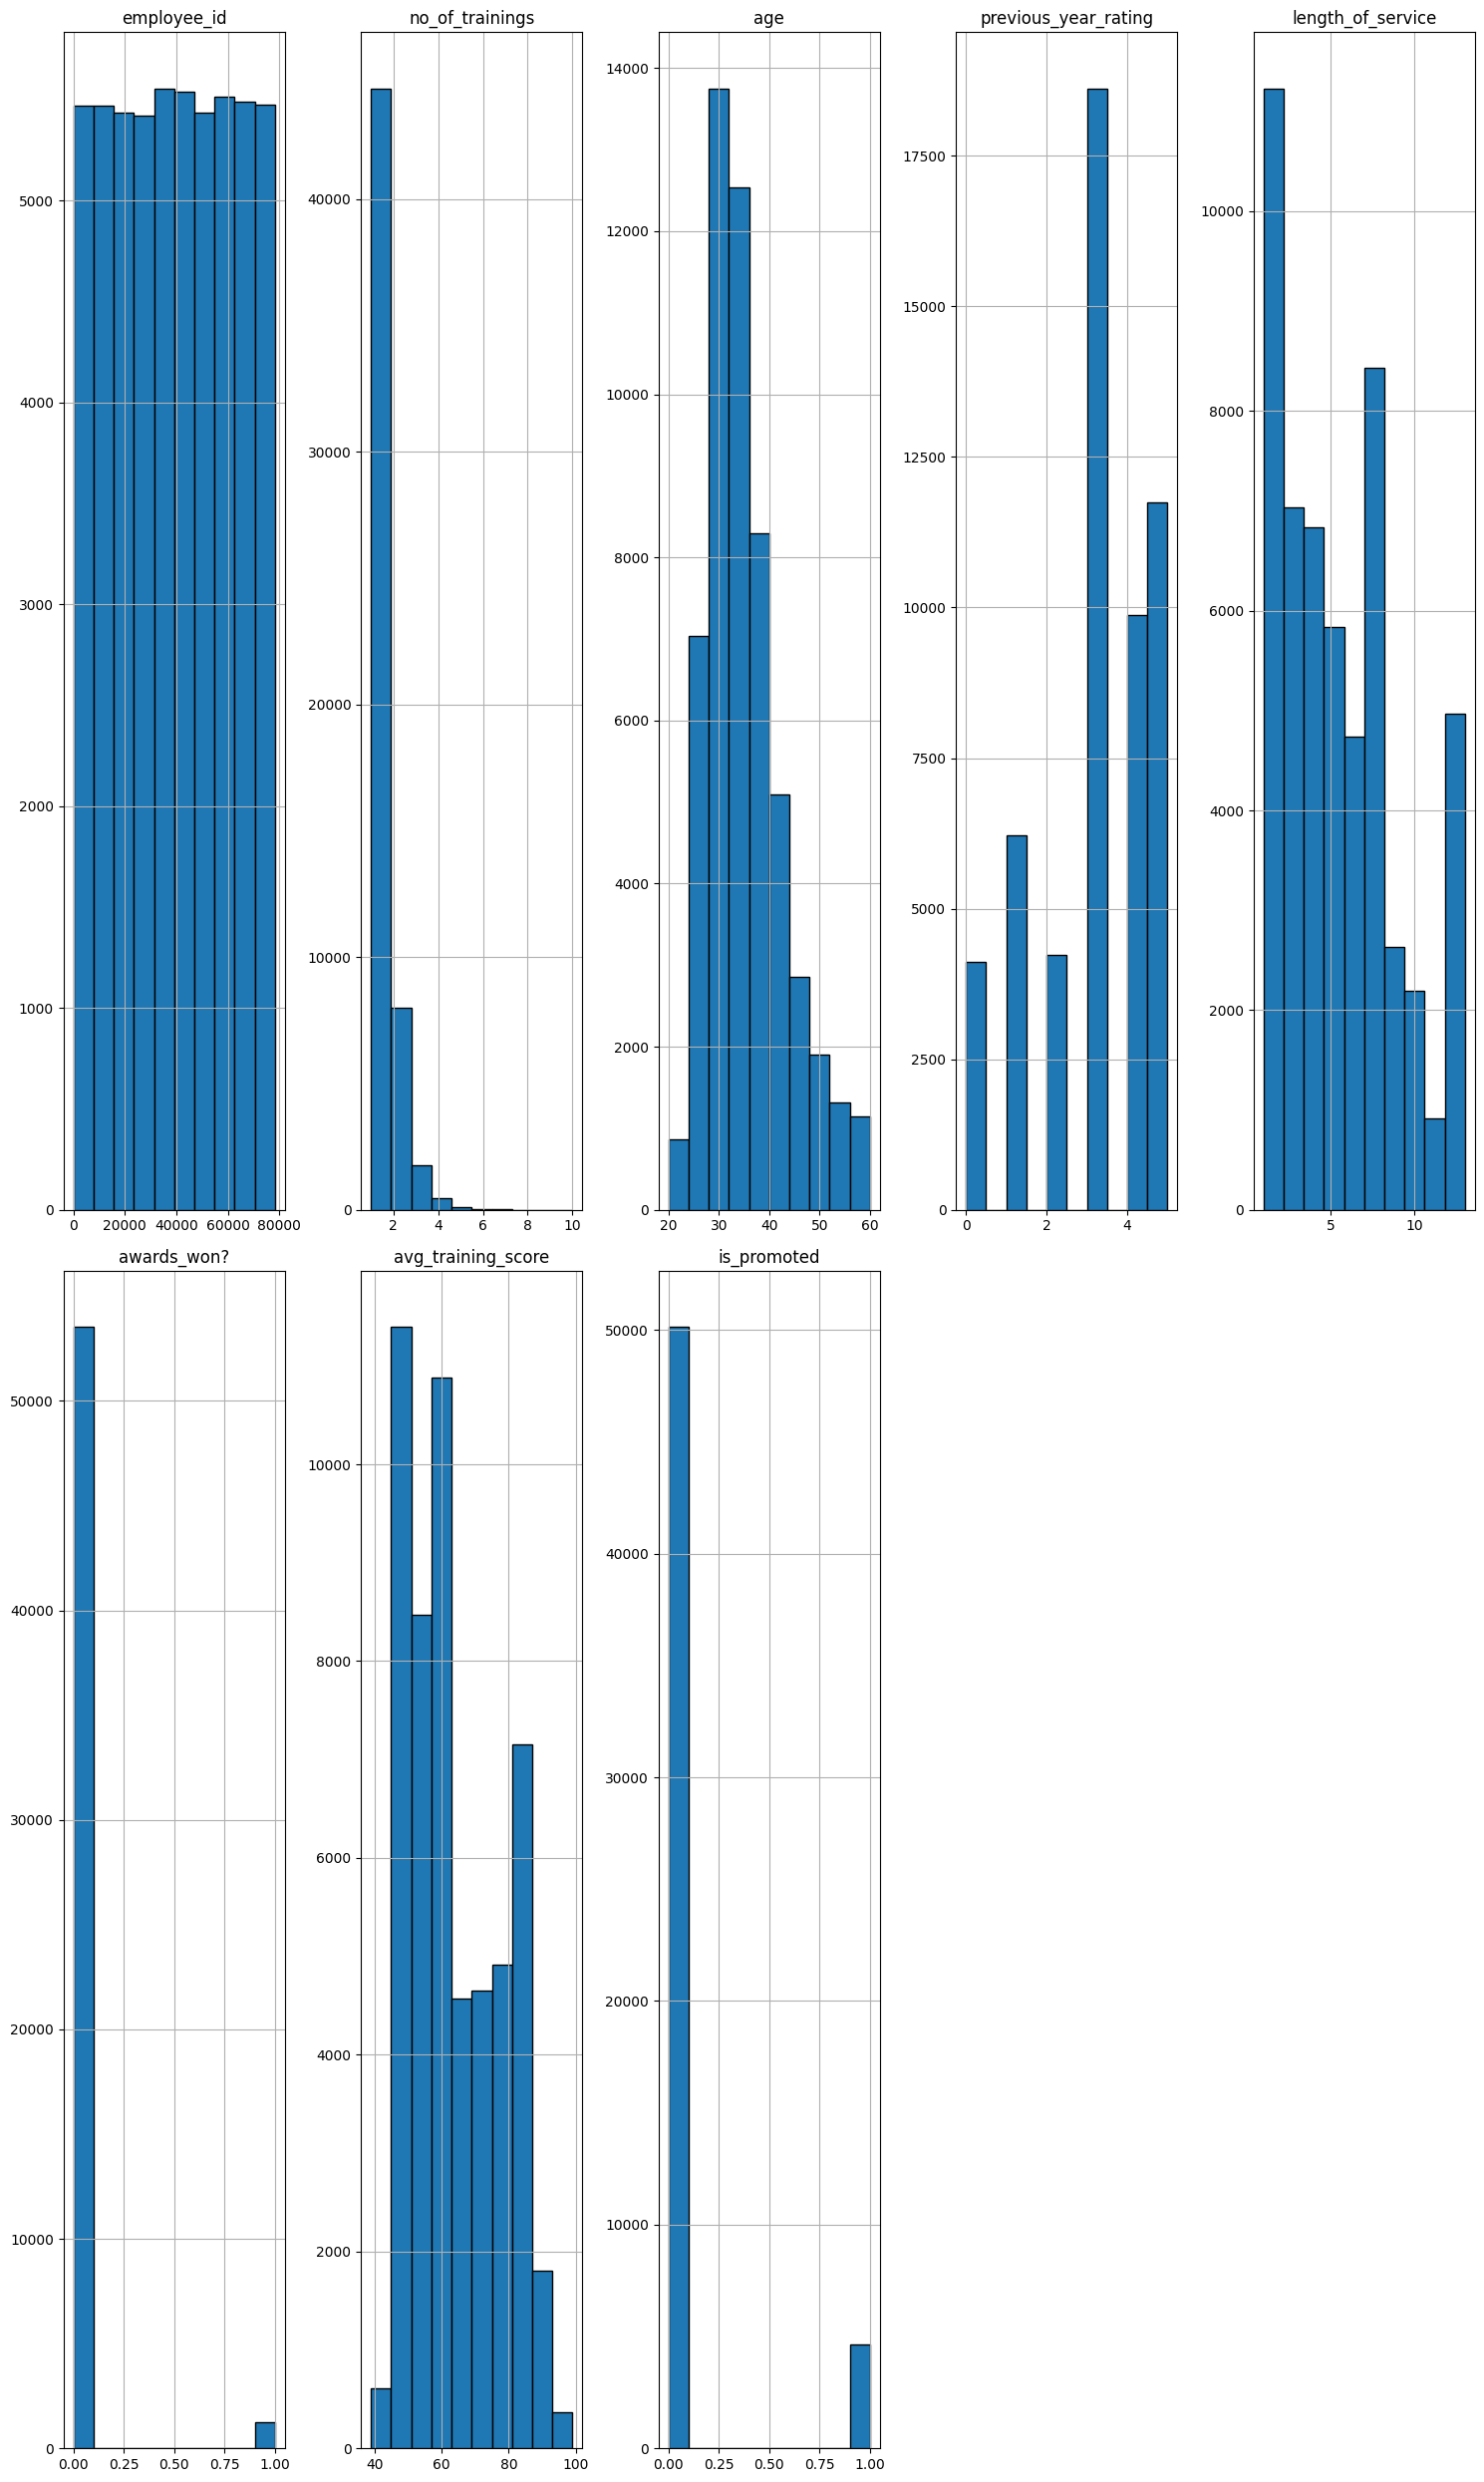

In [22]:
train.hist(bins=10, figsize=(15,25), layout=(-1, 5), edgecolor='black')
plt.tight_layout();

In [23]:
px.histogram(train,'is_promoted',facet_col='gender', color='is_promoted', marginal='rug')

In [24]:
px.histogram(train, 'age',color='education', facet_col='education', barmode='group')

In [25]:
px.strip(train, 'length_of_service','age')

In [ ]:
train_corr = train.select_dtypes(include=[np.number]).corr()
px.imshow(train_corr, text_auto=True, title='Correlation Between the Variables in the Model', height=1000)


In [27]:
train = train.drop(['region', 'employee_id'], axis = 1)
test = test.drop([ 'region', 'employee_id'], axis = 1)
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [28]:
train.select_dtypes('object').head()

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other


In [29]:
train.education.value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [30]:
train['education']=train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3,2,1))
test['education']=test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3,2,1))

/var/folders/vf/50v_5yhx6vq1by3x443hc2v80000gn/T/ipykernel_73097/2012357678.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/vf/50v_5yhx6vq1by3x443hc2v80000gn/T/ipykernel_73097/2012357678.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [31]:
def manual_label_encoding(df, column):
    unique_values = sorted(df[column].unique()) 
    mapping = {value: idx for idx, value in enumerate(unique_values)} 
    df[column] = df[column].map(mapping)
    return mapping 

categorical_columns = ['department', 'gender', 'recruitment_channel']

encoding_mappings = {}

for col in categorical_columns:
    encoding_mappings[col] = manual_label_encoding(train, col)  
    test[col] = test[col].map(encoding_mappings[col])  

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)


Index([], dtype='object')
Index([], dtype='object')


In [32]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,3,0,2,1,35,5.0,8,0,49,0
1,4,2,1,0,1,30,5.0,4,0,60,0
2,7,2,1,2,1,34,3.0,7,0,50,0
3,7,2,1,0,2,39,1.0,10,0,50,0
4,8,2,1,0,1,45,3.0,2,0,73,0


In [33]:
y=train['is_promoted']
x=train.drop(['is_promoted'],axis=1)
x_test=test

In [34]:
px.histogram(train,x='is_promoted', color='is_promoted', title='Distribution of Target Variable')

In [35]:
def random_over_sampler(x, y):
    if isinstance(y, pd.Series):
        y_values = y.values
    else:
        y_values = y

    unique_classes = np.unique(y_values)
    class_indices = {cls: np.where(y_values == cls)[0] for cls in unique_classes}
    
    max_count = max(len(indices) for indices in class_indices.values())
    
    resampled_indices = []
    for cls, indices in class_indices.items():
        current_count = len(indices)
        if current_count < max_count:
            n_needed = max_count - current_count
            extra_indices = np.random.choice(indices, size=n_needed, replace=True)
            indices = np.concatenate([indices, extra_indices])
        resampled_indices.append(indices)
    
    all_indices = np.concatenate(resampled_indices)
    np.random.shuffle(all_indices)

    if isinstance(x, pd.DataFrame):
        x_resampled = x.iloc[all_indices]
    else:
        x_resampled = x[all_indices]
        
    if isinstance(y, pd.Series):
        y_resampled = y.iloc[all_indices]
    else:
        y_resampled = y[all_indices]
    
    return x_resampled, y_resampled

x_resample, y_resample = random_over_sampler(x, y)

print(x_resample.shape)
print(y_resample.shape)

(100280, 10)
(100280,)


In [36]:
px.histogram(
    y_resample, 
    x="is_promoted", 
    color="is_promoted", 
    title="Distribution of Target After Resampling"
)


In [37]:
print("Before Resampling:")
print(y.value_counts())

print("After Resampling:")
y_resample = pd.DataFrame(y_resample)
print(y_resample.value_counts())

Before Resampling:
is_promoted
0    50140
1     4668
Name: count, dtype: int64
After Resampling:
is_promoted
0              50140
1              50140
Name: count, dtype: int64


In [38]:
def manual_train_test_split(X, y, test_size=0.2, random_state=0):

    np.random.seed(random_state)
    indices = np.arange(len(X))            
    np.random.shuffle(indices)             
    
    split_idx = int((1 - test_size) * len(X))
    train_idx = indices[:split_idx]
    valid_idx = indices[split_idx:]
    
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    return X_train, X_valid, y_train, y_valid

In [39]:
X_train, X_valid, y_train, y_valid = manual_train_test_split(
    x_resample,
    y_resample,
    test_size=0.2,
    random_state=0
)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
print("Shape of X_test:", x_test.shape)


Shape of X_train: (80224, 10)
Shape of y_train: (80224, 1)
Shape of X_valid: (20056, 10)
Shape of y_valid: (20056, 1)
Shape of X_test: (23490, 10)


In [40]:
X_train1 = X_train.values 
y_train1 = y_train.values.ravel().astype(int)
X_valid1 = X_valid.values 
y_valid1 = y_valid.values.ravel().astype(int) 

In [41]:
print("y_train type:", y_train1.dtype)  
print("y_train shape:", y_train1.shape)
print("X_train shape:", X_train1.shape) 

y_train type: int64
y_train shape: (80224,)
X_train shape: (80224, 10)


In [42]:
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
    def gini(self, y):
        if len(y) == 0:
            return 0
        y = y.ravel().astype(int) 
        counts = np.bincount(y)
        probs = counts / (len(y) + 1e-8) 
        return 1 - np.sum(probs**2)
    
    def best_split(self, X, y, features):
        best_gini = float('inf')
        best_feature, best_thresh = None, None
        
        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                left_idx = X_feat <= thresh
                if np.sum(left_idx) == 0 or np.sum(~left_idx) == 0:
                    continue
                gini_left = self.gini(y[left_idx])
                gini_right = self.gini(y[~left_idx])
                total_gini = (gini_left * np.sum(left_idx) + gini_right * np.sum(~left_idx)) / len(y)
                if total_gini < best_gini:
                    best_gini = total_gini
                    best_feature = feat
                    best_thresh = thresh
        return best_feature, best_thresh
    
    def build_tree(self, X, y, depth=0):
        if (depth >= self.max_depth or 
            len(y) < self.min_samples_split or 
            len(np.unique(y)) == 1):
            return {'pred': np.argmax(np.bincount(y))}
        
        features = np.random.choice(X.shape[1], size=int(np.sqrt(X.shape[1])), replace=False)
        feat, thresh = self.best_split(X, y, features)
        if feat is None:
            return {'pred': np.argmax(np.bincount(y))}
        
        left_idx = X[:, feat] <= thresh
        left = self.build_tree(X[left_idx], y[left_idx], depth+1)
        right = self.build_tree(X[~left_idx], y[~left_idx], depth+1)
        return {'feat': feat, 'thresh': thresh, 'left': left, 'right': right}
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)
    
    def predict_sample(self, sample, node):
        if 'pred' in node:
            return node['pred']
        if sample[node['feat']] <= node['thresh']:
            return self.predict_sample(sample, node['left'])
        else:
            return self.predict_sample(sample, node['right'])
    
    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])

class RandomForest:
    def __init__(self, n_trees=100, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
    
    def fit(self, X, y):
        for _ in range(self.n_trees):
            idx = np.random.choice(len(X), len(X), replace=True)
            X_boot = X[idx]
            y_boot = y[idx]
            
            tree = DecisionTree(self.max_depth, self.min_samples_split)
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)
    
    def predict(self, X):
        all_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_preds)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    cm = np.zeros((len(classes), len(classes)), dtype=int)
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm



In [ ]:
def k_fold_split(X, y, k=5, shuffle=True, random_state=None):
    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        indices = np.random.permutation(len(X))
    else:
        indices = np.arange(len(X))
    
    fold_sizes = np.full(k, len(X) // k)
    fold_sizes[: len(X) % k] += 1
    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate((indices[:start], indices[stop:]))
        folds.append((train_idx, val_idx))
        current = stop
    return folds

def cross_val_score_rf(X, y, n_trees, max_depth, min_samples_split, k=5):
    folds = k_fold_split(X, y, k=k, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in folds:
        X_train_cv, y_train_cv = X[train_idx], y[train_idx]
        X_val_cv, y_val_cv = X[val_idx], y[val_idx]
        
        model = RandomForest(n_trees=n_trees,
                             max_depth=max_depth,
                             min_samples_split=min_samples_split)
        model.fit(X_train_cv, y_train_cv)
        
        y_pred_cv = model.predict(X_val_cv)
        fold_acc = accuracy(y_val_cv, y_pred_cv)
        scores.append(fold_acc)
    
    return np.mean(scores)

def manual_grid_search_rf(X, y, param_grid, k=5):
    best_score = -1
    best_params = None
    
    import itertools
    
    keys = list(param_grid.keys())
    for combo in itertools.product(*(param_grid[key] for key in keys)):
        params = dict(zip(keys, combo))
        
        n_trees = params['n_trees']
        max_depth = params['max_depth']
        min_samples_split = params['min_samples_split']
        
        score = cross_val_score_rf(X, y,
                                   n_trees=n_trees,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   k=k)
        
        print("Params:", params, "CV Score:", score)
        
        if score > best_score:
            best_score = score
            best_params = params
    
    return best_params, best_score

param_grid = {
    'n_trees': [100, 300, 500, 800],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

best_params, best_score = manual_grid_search_rf(X_train1, y_train1, param_grid, k=5)

print("Best parameters found:", best_params)
print("Best CV Score:", best_score)

best_model = RandomForest(n_trees=best_params['n_trees'],
                          max_depth=best_params['max_depth'],
                          min_samples_split=best_params['min_samples_split'])
best_model.fit(X_train1, y_train1)

y_valid_pred = best_model.predict(X_valid1)
print("Validation Accuracy:", accuracy(y_valid1, y_valid_pred))


Params: {'n_trees': 100, 'max_depth': 10, 'min_samples_split': 2} CV Score: 0.7252443401400279
Params: {'n_trees': 100, 'max_depth': 10, 'min_samples_split': 5} CV Score: 0.7243843103947784
Params: {'n_trees': 100, 'max_depth': 10, 'min_samples_split': 10} CV Score: 0.7255186488947231
Params: {'n_trees': 100, 'max_depth': 20, 'min_samples_split': 2} CV Score: 0.8906437306755131
Params: {'n_trees': 100, 'max_depth': 20, 'min_samples_split': 5} CV Score: 0.890780845041359
Params: {'n_trees': 100, 'max_depth': 20, 'min_samples_split': 10} CV Score: 0.8825164888174845
Params: {'n_trees': 100, 'max_depth': 30, 'min_samples_split': 2} CV Score: 0.9216693334526687
Params: {'n_trees': 100, 'max_depth': 30, 'min_samples_split': 5} CV Score: 0.9195627535340449
Params: {'n_trees': 100, 'max_depth': 30, 'min_samples_split': 10} CV Score: 0.9119839683624784


TypeError: '>=' not supported between instances of 'int' and 'NoneType'

In [ ]:
model = RandomForest(n_trees=100, max_depth=30, min_samples_split=2)
model.fit(X_train1, y_train1)

y_train_pred = model.predict(X_train1)
y_valid_pred = model.predict(X_valid1)

print("Training Accuracy:", accuracy(y_train1, y_train_pred))
print("Validation Accuracy:", accuracy(y_valid1, y_valid_pred))

cm = confusion_matrix(y_valid1, y_valid_pred)
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix')
fig.update_layout(xaxis_title='Predicted', yaxis_title='True')
fig.show()

Training Accuracy: 0.9487933785400877
Validation Accuracy: 0.9299960111687275


In [49]:
print("Department Mapping:", encoding_mappings['department'])
print("Gender Mapping:", encoding_mappings['gender'])
print("Recruitment Channel Mapping:", encoding_mappings['recruitment_channel'])


Department Mapping: {'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3, 'Operations': 4, 'Procurement': 5, 'R&D': 6, 'Sales & Marketing': 7, 'Technology': 8}
Gender Mapping: {'f': 0, 'm': 1}
Recruitment Channel Mapping: {'other': 0, 'referred': 1, 'sourcing': 2}


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
